## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **housing prices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

Please submit a link your work notebook. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [this example solution](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/6.solution_making_predictions.ipynb).

In [17]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore")


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [18]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [19]:
# Target variable
Y = house_prices_df['saleprice']

# fit new model
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'yearbuilt', 'lotarea'] + dummy_column_names]

X = sm.add_constant(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('The number of observations in the training set is : {}'.format(X_train.shape[0]))
print('The number of observations in the test set is : {}'.format(X_test.shape[0]))

The number of observations in the training set is : 1168
The number of observations in the test set is : 292


In [20]:
X_train.head()

,const,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,yearbuilt,lotarea,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
151,1.000,5,969,2,440,969,1975,10356,0,0,1,0,1
262,1.000,8,2574,3,868,1482,2007,9588,0,0,1,0,1
1037,1.000,8,2263,2,905,1055,2001,9240,0,0,1,0,1
1183,1.000,5,1130,2,720,1120,1920,10800,0,0,1,0,1
933,1.000,7,1500,2,570,1500,2004,8487,0,0,1,0,1


In [21]:
X_train = sm.add_constant(X_train)

# fit the model using statsmodel
results = sm.OLS(Y_train, X_train).fit()

# print results summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     333.3
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:43:56   Log-Likelihood:                -13952.
No. Observations:                1168   AIC:                         2.793e+04
Df Residuals:                    1155   BIC:                         2.800e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.574e+05   1.03e+05     -5.405      

Adjusted Rsquared is 0.774 which means that approx 22.6% of the variance in our target variable is not explained

AIC and BIC are 27930 and 28000 respectively

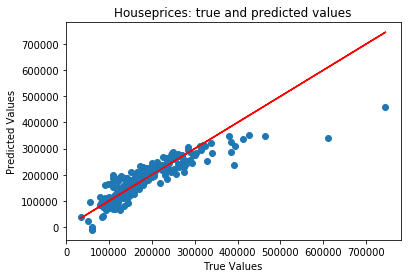

Mean absolute error of the prediction is: 24703.203195034595
Mean squared error of the prediction is: 1491284454.730784
Root mean squared error of the prediction is: 38617.152338446496
Mean absolute percentage error of the prediction is: 14.83591995566308


In [22]:
# add a constant to the model
X_test = sm.add_constant(X_test)

# make predictions
y_preds = results.predict(X_test)

# plot predictions against actual values
plt.scatter(Y_test, y_preds)
plt.plot(Y_test, Y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Houseprices: true and predicted values')
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds) / Y_test)) * 100))

We see evaluation metrics above, lets try adding some features and comparing models

In [23]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']
house_prices_df['int_qual_sf'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

# Target variable logtransformed
Y = np.log1p(house_prices_df['saleprice'])
# feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'yearbuilt', 'lotarea', 'int_qual_sf'] + dummy_column_names]


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('The number of observations in the training set is : {}'.format(X_train.shape[0]))
print('The number of observations in the test set is : {}'.format(X_test.shape[0]))

The number of observations in the training set is : 1168
The number of observations in the test set is : 292


In [25]:
X_train.head()

,overallqual,grlivarea,garagecars,garagearea,yearbuilt,lotarea,int_qual_sf,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
151,5,969,2,440,1975,10356,9690,0,0,1,0,1
262,8,2574,3,868,2007,9588,32448,0,0,1,0,1
1037,8,2263,2,905,2001,9240,26544,0,0,1,0,1
1183,5,1130,2,720,1920,10800,11250,0,0,1,0,1
933,7,1500,2,570,2004,8487,21000,0,0,1,0,1


Add a constant to training data

In [26]:
X_train = sm.add_constant(X_train)

In [27]:
# fit the model using statsmodel
results = sm.OLS(Y_train, X_train).fit()

# print results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     452.6
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:45:53   Log-Likelihood:                 438.50
No. Observations:                1168   AIC:                            -851.0
Df Residuals:                    1155   BIC:                            -785.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.3177      0.467     15.684      

The adjusted Rsquared is 0.823 which suggests that 17.7% of the variance in our target variable saleprice is not explained by our model.

AIC and BIC are -851 and -785 respectively which are both much better than previous model

#### Evaluate the test set performance

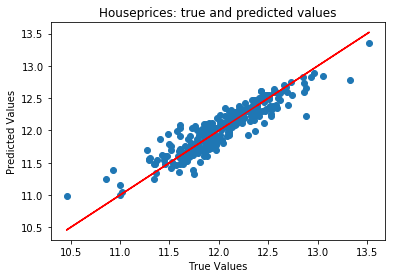

In [28]:
# add a constant to the model
X_test = sm.add_constant(X_test)

# make predictions
y_preds = results.predict(X_test)

# plot predictions against actual values
plt.scatter(Y_test, y_preds)
plt.plot(Y_test, Y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Houseprices: true and predicted values')
plt.show()

In [29]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds) / Y_test)) * 100))

Mean absolute error of the prediction is: 0.12126458240271974
Mean squared error of the prediction is: 0.026541207603956226
Root mean squared error of the prediction is: 0.1629147249451572
Mean absolute percentage error of the prediction is: 1.0135435383344769


For each evaluation metric we see that our 2nd model performs much better on the test set